In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
from data_utils import data_reader

data_path = './data'
data_file = "治疗过程记录.xlsx"
output_path = './outputs'
data = data_reader(data_path,data_file,fill_na="")

data

,mr_bah,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,...,specimen_code,item_group_name,item_code,item_name,result_quantitative,result_qualitative,result_unit,reference_range,reference_range_alert,report_date
1,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0031,葡萄糖[Glu],0.59,0.59,mmol/L,2.5-4.5,L,20220706
2,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0087,微量蛋白[MTP],2.02,2.02,g/L,0.15-0.45,H,20220706
3,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0095,蛋白定性,250,阳性(+),,,,20220706
4,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液常规(检),C0093,透明度,244,混浊,,,,20220706
5,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0093,透明度,244,混浊,,,,20220706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液常规(检),C0093,透明度,244,混浊,,,,20231128
8369,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液细胞学检查(检),C0100,多个核细胞百分比,70,70,%,,,20231128
8370,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0031,葡萄糖[Glu],2.70,2.70,mmol/L,2.5-4.5,,20231128
8371,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0087,微量蛋白[MTP],1.88,1.88,g/L,0.15-0.45,H,20231128


### 数据预处理

In [3]:
time_path = os.path.join(output_path,"time_factor.csv")
time_factor_df = pd.read_csv(time_path)

In [4]:
from data_utils import Infector_chooser

rows_with_infection, rows_without_infection = Infector_chooser(data)
# 筛选出感染者和未感染者住院号
admission_num_infection = pd.unique(rows_with_infection['mr_bah'])
admission_num_noninfection = pd.unique(rows_without_infection['mr_bah'])
# 筛选出时间序列中的感染记录和未感染记录
infection_mask = np.isin(time_factor_df['mr_bah'],admission_num_infection)
time_factor_infection = time_factor_df[infection_mask]
time_factor_noninfection = time_factor_df[~infection_mask]

### 数据检验

In [5]:
df_infection = time_factor_infection[time_factor_infection['脑脊液常规(检)-凝固性'] !=0]
df_infection = df_infection[df_infection['mr_bah'] == 'L0001110255']['脑脊液常规(检)-白细胞计数']
df_infection

75    3843
77    1854
79    1050
80    3133
82    1211
84       8
86       4
88      11
90      14
92       1
Name: 脑脊液常规(检)-白细胞计数, dtype: int64

In [6]:
def diff_features(series):
    return {
        'diff_1': series.diff(1).iloc[-1],
        'diff_2': series.diff(2).iloc[-1]
    }
diff_features(df_infection)

{'diff_1': -13.0, 'diff_2': -10.0}

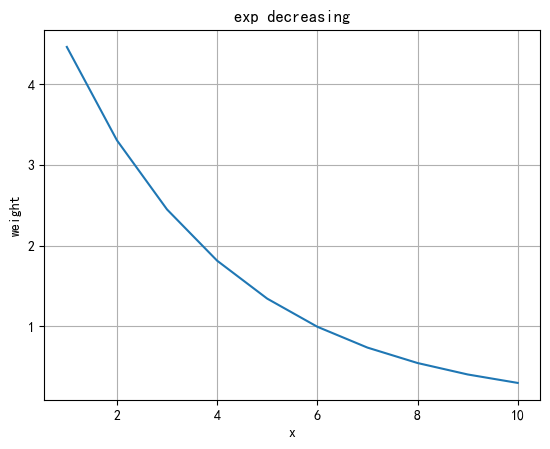

33195.44042541417

In [36]:
def weighted_exp_decreasing_mean(series,alpha=0.1,plot=False):
    alpha = 0.3    

    x = np.linspace(1, len(series), len(series))

    y = np.exp(-alpha * x) / ((1/alpha) * np.exp(-alpha * x[-1]))
    
    if plot:
        plt.plot(x, y)
        plt.title('exp decreasing')
        plt.xlabel('x')
        plt.ylabel('weight')
        plt.grid(True)
        plt.show()
    
    return (y*series).sum()
weighted_exp_decreasing_mean(df_infection,plot=True)

### 数据预处理

In [37]:
# df_infection_regular = time_factor_infection[time_factor_infection['脑脊液常规(检)-凝固性'] !=0]
# df_infection_bio = time_factor_infection[time_factor_infection['脑脊液常规(检)-凝固性'] ==0]
# df_noninfection_regular = time_factor_noninfection[time_factor_noninfection['脑脊液常规(检)-凝固性'] !=0]
# df_noninfection_bio = time_factor_noninfection[time_factor_noninfection['脑脊液常规(检)-凝固性'] ==0]

#### 对时间序列求指数平均

In [38]:
df_regular = time_factor_df[time_factor_df['脑脊液常规(检)-凝固性'] !=0]
df_bio = time_factor_df[time_factor_df['脑脊液常规(检)-凝固性'] ==0]
admission_num = pd.unique(time_factor_df['mr_bah'])

In [39]:
# TODO:处理inf
# [取0值]，均值，最大，最小

def batch_exp_mean(df,mr_bah=[],mean_method=weighted_exp_decreasing_mean,fill_inf=0):
    num_features = df.shape[-1] - 2
    
    meaned_matrix = np.zeros((len(mr_bah),num_features))
    
    for i,mr_bah_no in enumerate(mr_bah):
        mask = (df['mr_bah'] == mr_bah_no)
        to_mean_matrix = df[mask].to_numpy()[:,2:].astype(np.float32)
        
        
        if to_mean_matrix.shape[0] == 1:
            to_mean_matrix[np.isinf(to_mean_matrix)] = fill_inf # 此处可能存在inf
            meaned_matrix[i] = to_mean_matrix
        else:
            meaned_series = np.zeros(num_features)
            for j in range(num_features):  # 为了排除缺失值的影响，我们直接循环而不使用广播操作
                to_mean_series = to_mean_matrix[:,j]
                to_mean_series = to_mean_series[~np.isinf(to_mean_series)] # 去除缺失值

                if len(to_mean_series) == 0:
                    mean_value = fill_inf # 此处直接填inf
                else:
                    mean_value = mean_method(to_mean_series)

                meaned_series[j] = mean_value
            meaned_matrix[i] = meaned_series
        
    return_df = pd.DataFrame(meaned_matrix,columns=df.columns[-num_features:],index=mr_bah)
    return_df.index.name = 'mr_bah'
    return return_df

In [40]:
# infection_regular_matrix = batch_exp_mean(df_infection_regular,admission_num_infection)
# infection_bio_matrix = batch_exp_mean(df_infection_bio,admission_num_infection)
# noninfection_regular_matrix = batch_exp_mean(df_noninfection_regular,admission_num_noninfection)
# noninfection_bio_matrix = batch_exp_mean(df_noninfection_bio,admission_num_noninfection)

In [41]:
regular_matrix = batch_exp_mean(df_regular,admission_num)
bio_matrix = batch_exp_mean(df_bio,admission_num)

In [42]:
quantize_matrix = regular_matrix + bio_matrix
quantize_matrix

,脑脊液常规(检)-凝固性,脑脊液常规(检)-多个核细胞百分比,脑脊液常规(检)-微量蛋白[MTP],脑脊液常规(检)-氯[CL],脑脊液常规(检)-白细胞计数,脑脊液常规(检)-葡萄糖[Glu],脑脊液常规(检)-蛋白定性,脑脊液常规(检)-透明度,脑脊液生化(检)-凝固性,脑脊液生化(检)-多个核细胞百分比,...,脑脊液生化(检)-蛋白定性,脑脊液生化(检)-透明度,脑脊液细胞学检查(检)-凝固性,脑脊液细胞学检查(检)-多个核细胞百分比,脑脊液细胞学检查(检)-微量蛋白[MTP],脑脊液细胞学检查(检)-氯[CL],脑脊液细胞学检查(检)-白细胞计数,脑脊液细胞学检查(检)-葡萄糖[Glu],脑脊液细胞学检查(检)-蛋白定性,脑脊液细胞学检查(检)-透明度
mr_bah,,,,,,,,,,,,,,,,,,,,,
L0000900097,2915.919965,470.351935,0.0,0.0,1580.278584,0.0,2954.074958,2887.686550,0.0,0.0,...,0.0,0.0,2915.919965,470.351935,0.0,0.0,1580.278584,0.0,2954.074958,2887.686550
L0000903157,172.714622,24.072670,0.0,0.0,19.063602,0.0,175.234453,171.409665,0.0,0.0,...,0.0,0.0,172.714622,24.072670,0.0,0.0,19.063602,0.0,175.234453,171.409665
L0000996807,731.449777,138.679301,0.0,0.0,188.597364,0.0,740.406305,723.969011,0.0,0.0,...,0.0,0.0,731.449777,138.679301,0.0,0.0,188.597364,0.0,740.406305,723.969011
L0001018730,487.421183,26.517289,0.0,0.0,229.643950,0.0,493.689606,481.452760,0.0,0.0,...,0.0,0.0,487.421183,26.517289,0.0,0.0,229.643950,0.0,493.689606,481.452760
L0001028637,306.640354,62.149615,0.0,0.0,1774.532846,0.0,311.488405,303.432210,0.0,0.0,...,0.0,0.0,306.640354,62.149615,0.0,0.0,1774.532846,0.0,311.488405,303.432210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L0001182434,172.714622,27.687543,0.0,0.0,22.468560,0.0,174.829495,171.004707,0.0,0.0,...,0.0,0.0,172.714622,27.687543,0.0,0.0,22.468560,0.0,174.829495,171.004707
L0001184723,172.714622,21.642924,0.0,0.0,16.933856,0.0,174.829495,171.004707,0.0,0.0,...,0.0,0.0,172.714622,21.642924,0.0,0.0,16.933856,0.0,174.829495,171.004707
L0001185049,245.000000,86.000000,0.0,0.0,61.000000,0.0,248.000000,244.000000,0.0,0.0,...,0.0,0.0,245.000000,86.000000,0.0,0.0,61.000000,0.0,248.000000,244.000000


#### 选择非空列

In [43]:
zero_mask = quantize_matrix.to_numpy().sum(0) != 0
selected_columns = quantize_matrix.columns[zero_mask]
selected_columns

Index(['脑脊液常规(检)-凝固性', '脑脊液常规(检)-多个核细胞百分比', '脑脊液常规(检)-白细胞计数', '脑脊液常规(检)-蛋白定性',
       '脑脊液常规(检)-透明度', '脑脊液生化(检)-微量蛋白[MTP]', '脑脊液生化(检)-氯[CL]',
       '脑脊液生化(检)-葡萄糖[Glu]', '脑脊液细胞学检查(检)-凝固性', '脑脊液细胞学检查(检)-多个核细胞百分比',
       '脑脊液细胞学检查(检)-白细胞计数', '脑脊液细胞学检查(检)-蛋白定性', '脑脊液细胞学检查(检)-透明度'],
      dtype='object')

In [44]:
quantize_matrix = quantize_matrix[selected_columns]
quantize_matrix

,脑脊液常规(检)-凝固性,脑脊液常规(检)-多个核细胞百分比,脑脊液常规(检)-白细胞计数,脑脊液常规(检)-蛋白定性,脑脊液常规(检)-透明度,脑脊液生化(检)-微量蛋白[MTP],脑脊液生化(检)-氯[CL],脑脊液生化(检)-葡萄糖[Glu],脑脊液细胞学检查(检)-凝固性,脑脊液细胞学检查(检)-多个核细胞百分比,脑脊液细胞学检查(检)-白细胞计数,脑脊液细胞学检查(检)-蛋白定性,脑脊液细胞学检查(检)-透明度
mr_bah,,,,,,,,,,,,,
L0000900097,2915.919965,470.351935,1580.278584,2954.074958,2887.686550,10.800538,1500.687326,37.935101,2915.919965,470.351935,1580.278584,2954.074958,2887.686550
L0000903157,172.714622,24.072670,19.063602,175.234453,171.409665,1.025775,85.500949,2.505128,172.714622,24.072670,19.063602,175.234453,171.409665
L0000996807,731.449777,138.679301,188.597364,740.406305,723.969011,1.657144,367.036687,12.366390,731.449777,138.679301,188.597364,740.406305,723.969011
L0001018730,487.421183,26.517289,229.643950,493.689606,481.452760,0.991456,250.014758,6.362247,487.421183,26.517289,229.643950,493.689606,481.452760
L0001028637,306.640354,62.149615,1774.532846,311.488405,303.432210,3.288869,148.766176,4.617637,306.640354,62.149615,1774.532846,311.488405,303.432210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
L0001182434,172.714622,27.687543,22.468560,174.829495,171.004707,0.388628,88.479621,2.311806,172.714622,27.687543,22.468560,174.829495,171.004707
L0001184723,172.714622,21.642924,16.933856,174.829495,171.004707,0.466491,152.646259,3.403432,172.714622,21.642924,16.933856,174.829495,171.004707
L0001185049,245.000000,86.000000,61.000000,248.000000,244.000000,2.310000,108.900002,8.310000,245.000000,86.000000,61.000000,248.000000,244.000000


#### 读入病症onehot

In [45]:
onehot_path = os.path.join(output_path,"onehot_illness.csv")
onehot_illness = pd.read_csv(onehot_path)

onehot_illness = onehot_illness.drop(columns=['颅内感染'])
onehot_illness

,mr_bah,胸腔积液,肺部感染,脑水肿,高血压病3级（极高危）,面肌痉挛,电解质紊乱,三叉神经痛,颅内动脉瘤破裂伴蛛网膜下腔出血,肺气肿,...,子宫腺肌瘤,椎间盘突出,共济失调,肺良性肿瘤,大脑动脉狭窄脑梗死,癫痫大发作状态,弥漫性颅内压增高,冠状动脉支架植入后状态,急性前间壁心肌梗死,肺原位癌
0,L0001110255,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,L0001106901,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,L0001118051,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,L0001121508,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,L0001123366,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,L0001182434,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
187,L0001184723,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,L0001185049,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,L0001185394,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 读入手术onehot

In [46]:
onehot_path = os.path.join(output_path,"onehot_op.csv")
onehot_op = pd.read_csv(onehot_path)

target = onehot_op['颅内感染']
onehot_op = onehot_op.drop(columns=['颅内感染'])
onehot_op

,mr_bah,腰椎穿刺术,脑血管造影,硬脑膜补片修补术,颅骨去骨瓣减压术,脑内血肿清除术,内镜下面神经微血管减压术,脑室钻孔引流术,内镜下三叉神经微血管减压术,腰大池引流术,...,脊髓病损切除术,胸腔镜下肺楔形切除术,胸腔闭式引流术,骨盆骨折切开复位钢板内固定术,皮肤和皮下坏死组织切除清创术,大脑中动脉（MCA分叉部）动脉瘤栓塞术（AN）,硬脑膜外切开引流术,额叶切除术,冠状动脉CT血管显像,面神经微血管减压术
0,L0001110255,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,L0001106901,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,L0001118051,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,L0001121508,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,L0001123366,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,L0001182434,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
187,L0001184723,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,L0001185049,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189,L0001185394,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 形成最终data

In [47]:
data_df = pd.merge(onehot_illness,onehot_op,on='mr_bah')
data_df = pd.merge(data_df,quantize_matrix,on='mr_bah')
data_df

,mr_bah,胸腔积液,肺部感染,脑水肿,高血压病3级（极高危）,面肌痉挛,电解质紊乱,三叉神经痛,颅内动脉瘤破裂伴蛛网膜下腔出血,肺气肿,...,脑脊液常规(检)-蛋白定性,脑脊液常规(检)-透明度,脑脊液生化(检)-微量蛋白[MTP],脑脊液生化(检)-氯[CL],脑脊液生化(检)-葡萄糖[Glu],脑脊液细胞学检查(检)-凝固性,脑脊液细胞学检查(检)-多个核细胞百分比,脑脊液细胞学检查(检)-白细胞计数,脑脊液细胞学检查(检)-蛋白定性,脑脊液细胞学检查(检)-透明度
0,L0001110255,0,1,0,0,0,0,0,0,0,...,4.079193e+03,3.984084e+03,3.533815e+01,1.262854e+03,2.517501e+01,4.011395e+03,4.546400e+02,3.319544e+04,4.079193e+03,3.984084e+03
1,L0001106901,0,0,0,0,0,0,0,0,0,...,1.762394e+02,1.716047e+02,4.573820e+00,7.529848e+01,7.400992e-01,1.731196e+02,4.346602e+01,6.574477e+03,1.762394e+02,1.716047e+02
2,L0001118051,0,0,0,0,0,0,0,0,0,...,1.721738e+09,1.680040e+09,1.671715e+07,8.363017e+08,5.525712e+07,5.999103e+08,1.010615e+07,3.490413e+08,6.102354e+08,5.952130e+08
3,L0001121508,0,0,0,0,0,0,0,0,0,...,1.282450e+06,1.252442e+06,1.432243e+04,6.457736e+05,1.397230e+04,7.474255e+05,1.805509e+05,5.911868e+06,7.594830e+05,7.421096e+05
4,L0001123366,1,1,0,0,0,1,0,0,0,...,2.480000e+02,2.420000e+02,6.500000e-01,1.324000e+02,3.620000e+00,2.450000e+02,0.000000e+00,6.000000e+00,2.480000e+02,2.420000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,L0001182434,0,0,0,1,0,0,1,0,0,...,1.748295e+02,1.710047e+02,3.886275e-01,8.847962e+01,2.311806e+00,1.727146e+02,2.768754e+01,2.246856e+01,1.748295e+02,1.710047e+02
187,L0001184723,0,0,0,0,0,0,0,0,0,...,1.748295e+02,1.710047e+02,4.664910e-01,1.526463e+02,3.403432e+00,1.727146e+02,2.164292e+01,1.693386e+01,1.748295e+02,1.710047e+02
188,L0001185049,0,0,0,0,1,0,0,0,0,...,2.480000e+02,2.440000e+02,2.310000e+00,1.089000e+02,8.310000e+00,2.450000e+02,8.600000e+01,6.100000e+01,2.480000e+02,2.440000e+02
189,L0001185394,0,1,0,1,0,1,0,0,0,...,2.500000e+02,2.440000e+02,2.540000e+00,1.221000e+02,2.850000e+00,2.450000e+02,5.100000e+01,2.650000e+02,2.500000e+02,2.440000e+02


In [48]:
target.shape

(191,)

In [49]:
data_df.shape

(191, 456)

## 训练

### 决策森林

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data_df.iloc[:,1:].to_numpy().astype(np.float32)  # 训练数据
y = target.to_numpy().astype(np.float32)  # 二分类目标

# 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 随机森林模型
random_forest = RandomForestClassifier(n_estimators=1, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8974358974358975


### 暴搜参数

In [63]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # 示例数据（替换为你的实际数据）
# X = data_df.iloc[:,1:].to_numpy().astype(np.float32)  # 训练数据
# y = target.to_numpy().astype(np.float32)  # 二分类目标

# # 数据分割为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 数据标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # 定义随机森林分类器
# rf = RandomForestClassifier(random_state=42)

# # 定义参数网格
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'criterion': ['entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# # 交叉验证
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # 输出最佳参数
# print("Best Parameters:", grid_search.best_params_)

# # 使用最佳参数进行预测
# best_rf = grid_search.best_estimator_
# y_pred_best_rf = best_rf.predict(X_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [64]:
print("Random Forest Best Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Random Forest Best Model Accuracy: 0.8974358974358975


In [65]:
print("Random Forest Report:\n", )
print(classification_report(y_test, y_pred_rf))

Random Forest Report:

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        34
         1.0       0.67      0.40      0.50         5

    accuracy                           0.90        39
   macro avg       0.79      0.69      0.72        39
weighted avg       0.88      0.90      0.89        39



In [66]:
print("Confusion Matrix:\n", )
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:

[[33  1]
 [ 3  2]]
